In [1]:
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt

In [3]:
f_score_in_lockdown = open(path.join(
    'score', f"score_in_lockdown.json"), 'r', newline='', encoding='utf8')
f_score_pre_lockdown = open(path.join(
    'score', f"score_pre_lockdown.json"), 'r', newline='', encoding='utf8')


df_in_lockdown = pd.read_json(f_score_in_lockdown)
df_pre_lockdown = pd.read_json(f_score_pre_lockdown)

print(df_in_lockdown)

      family   friends  love_life  social_life  financial  habitat  work_life  \
0   -0.33310  0.000000   0.000000    -0.393500     0.0000  0.00000    0.00000   
1    0.00000  0.700300   0.000000     0.000000     0.0000  0.00000    0.00000   
2   -0.07770  0.126050  -0.159750    -0.332500     0.0000  0.00000   -0.29600   
3    0.10270  0.732033   0.000000     0.518450     0.0000  0.10270    0.00000   
4   -0.34184  0.449750   0.590000     0.624900     0.0000  0.00000    0.00000   
..       ...       ...        ...          ...        ...      ...        ...   
120  0.20225  0.000000   0.224175     0.662533     0.0000  0.00000    0.13395   
121 -0.09439  0.000000   0.132640    -0.571900    -0.1779  0.00000    0.00000   
122 -0.19616  0.701225   0.482045     0.671650     0.0000  0.21075    0.16440   
123  0.00000  0.000000   0.000000     0.458800     0.0000  0.00000    0.00000   
124  0.00000  0.000000   0.000000     0.000000     0.0000  0.00000    0.00000   

     study_life  medication

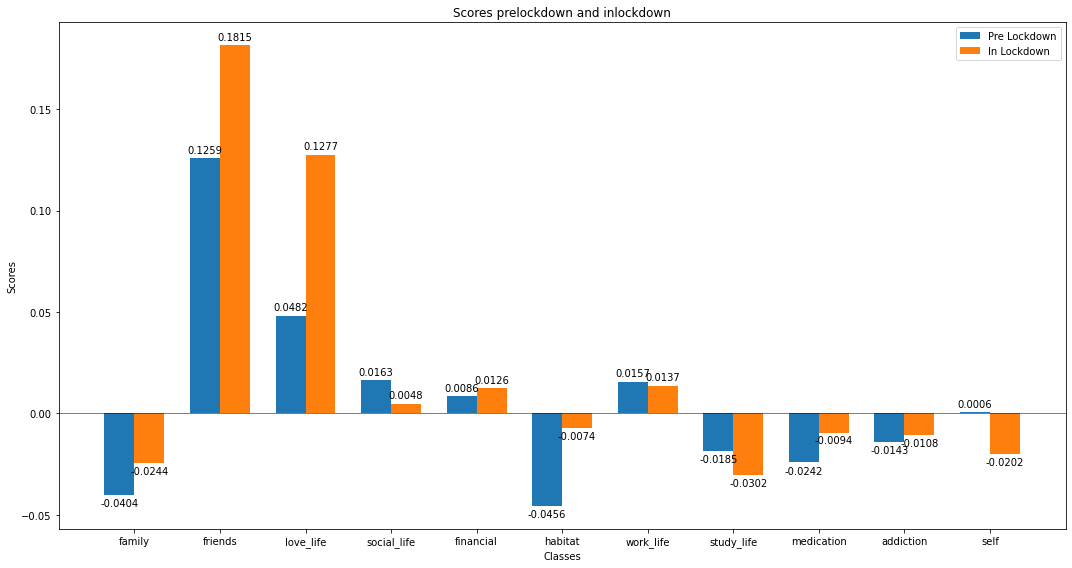

In [10]:
labels = df_in_lockdown.columns.values.tolist()
x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, df_pre_lockdown.mean(), width, label='Pre Lockdown')
rects2 = ax.bar(x + width/2, df_in_lockdown.mean(), width, label='In Lockdown')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Scores prelockdown and inlockdown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.axhline(y=0, lw=0.5, color='k')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height if height > 0 else height-0.008),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()